In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [2]:
data=pd.read_csv(r"C:\Users\User\Downloads\titanic_dataset(1).csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Checking basic details of the dataset

In [3]:
data.shape

(891, 12)

In [4]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#Handling missing values.

In [8]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
data['Age']=data['Age'].fillna(data['Age'].mean())

In [10]:
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [11]:
data=data.drop('Cabin',axis=1)

In [12]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Handling outliers in at least 3 columns in the dataset

<AxesSubplot:>

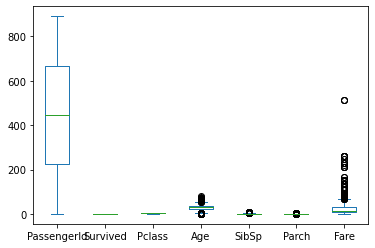

In [13]:
data.plot(kind='box', vert=True)

<AxesSubplot:ylabel='Age'>

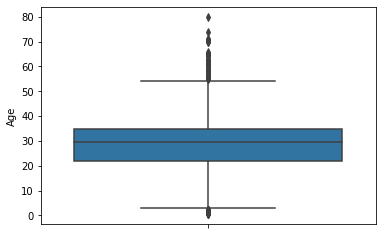

In [14]:
sns.boxplot(y=data["Age"])

In [15]:
Q1 = np.percentile(data['Age'],25,interpolation = 'midpoint')
Q2 = np.percentile(data['Age'],50,interpolation = 'midpoint')
Q3 = np.percentile(data['Age'],75,interpolation = 'midpoint')

IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

print("IQR is ",IQR)
print("Lower limit is" ,lower_limit)
print("Upper Limit is",upper_limit)

IQR is  13.0
Lower limit is 2.5
Upper Limit is 54.5


In [16]:
index = data[(data['Age'] >= 54.5)|(data['Age'] <= 2.5)].index
data.drop(index, inplace=True)

<AxesSubplot:ylabel='Age'>

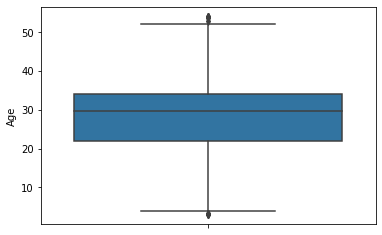

In [17]:
sns.boxplot(y=data["Age"])

<AxesSubplot:ylabel='Fare'>

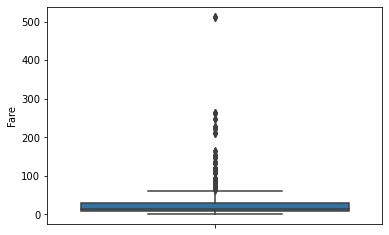

In [18]:
sns.boxplot(y=data['Fare'])

In [19]:
Q1 = np.percentile(data['Fare'],25,interpolation = 'midpoint')
Q2 = np.percentile(data['Fare'],50,interpolation = 'midpoint')
Q3 = np.percentile(data['Fare'],75,interpolation = 'midpoint')

IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

print("IQR is ",IQR)
print("Lower limit is" ,lower_limit)
print("Upper Limit is",upper_limit)

IQR is  22.174999999999997
Lower limit is -25.366699999999994
Upper Limit is 63.333299999999994


In [20]:
index = data[(data['Fare'] >=63.333299999999994 )].index
data.drop(index, inplace=True)

<AxesSubplot:ylabel='Fare'>

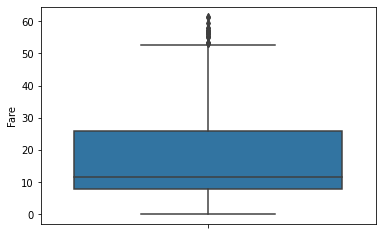

In [21]:
sns.boxplot(y=data['Fare'])

<AxesSubplot:ylabel='SibSp'>

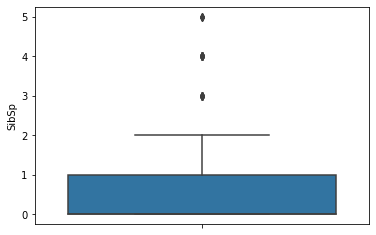

In [22]:
sns.boxplot(y=data['SibSp'])

In [23]:
Q1 = np.percentile(data['SibSp'],25,interpolation = 'midpoint')
Q2 = np.percentile(data['SibSp'],50,interpolation = 'midpoint')
Q3 = np.percentile(data['SibSp'],75,interpolation = 'midpoint')

IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

print("IQR is ",IQR)
print("Lower limit is" ,lower_limit)
print("Upper Limit is",upper_limit)

IQR is  1.0
Lower limit is -1.5
Upper Limit is 2.5


In [24]:
index = data[(data['SibSp'] >=2.5 )].index
data.drop(index, inplace=True)

<AxesSubplot:ylabel='SibSp'>

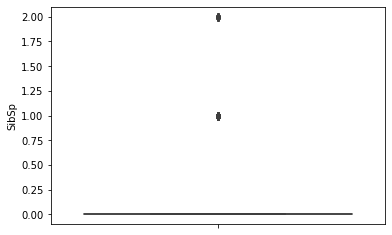

In [25]:
sns.boxplot(y=data['SibSp'])

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

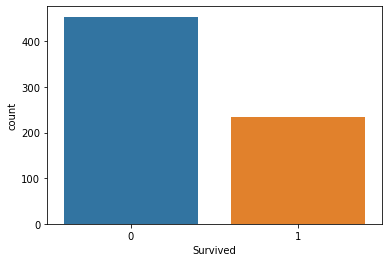

In [26]:
sns.countplot(data['Survived'])

In [27]:
#Correlation matrix

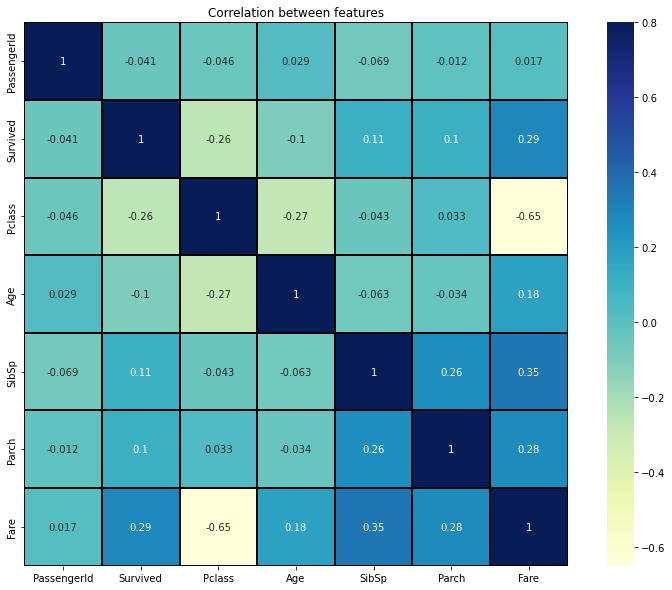

In [28]:
corr=data.corr()#["Survived"]
plt.figure(figsize=(14, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features')
plt.show()

In [29]:
hig_corr = data.corr()
hig_corr_features = hig_corr.index[abs(hig_corr["Fare"]) >= 0.25]
hig_corr_features

Index(['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare'], dtype='object')

# Encoding

In [30]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [31]:
#label encoding
from sklearn.preprocessing import LabelEncoder
ln=LabelEncoder()
data['Sex'] = ln.fit_transform(data['Sex'])  

In [32]:
data=pd.get_dummies(data)
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward",...,Ticket_W./C. 14258,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.000000,1,0,7.2500,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,1,3,0,26.000000,0,0,7.9250,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,0,35.000000,1,0,53.1000,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,1,35.000000,0,0,8.0500,0,0,...,0,0,0,0,0,0,0,0,0,1
5,6,0,3,1,29.699118,0,0,8.4583,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,0,0,...,0,0,0,0,0,0,0,0,0,1
887,888,1,1,0,19.000000,0,0,30.0000,0,0,...,0,0,0,0,0,0,0,0,0,1
888,889,0,3,0,29.699118,1,2,23.4500,0,0,...,0,0,1,0,0,0,0,0,0,1
889,890,1,1,1,26.000000,0,0,30.0000,0,0,...,0,0,0,0,0,0,0,1,0,0


In [33]:
#Model prediction

In [34]:
y=data['Survived']
x=data.drop('Survived',axis=1)

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [36]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
x_train

array([[-0.34517593,  0.68030823, -1.54284416, ...,  2.27837908,
        -0.35283112, -1.63503313],
       [-1.22514853,  0.68030823,  0.6481536 , ..., -0.43890852,
         2.83421716, -1.63503313],
       [-1.3587158 ,  0.68030823, -1.54284416, ..., -0.43890852,
         2.83421716, -1.63503313],
       ...,
       [-0.38053197,  0.68030823, -1.54284416, ..., -0.43890852,
         2.83421716, -1.63503313],
       [ 0.45622769, -2.1170786 , -1.54284416, ..., -0.43890852,
        -0.35283112,  0.6116084 ],
       [-1.26050457, -0.71838518,  0.6481536 , ..., -0.43890852,
        -0.35283112,  0.6116084 ]])

# Naive Bayes Classifier

In [37]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [38]:
y_pred=classifier.predict(x_test)
y_pred

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1], dtype=int64)

In [39]:
#Checking Gaussian method with confusion matrix

In [40]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)

0.42028985507246375

In [41]:
from sklearn.naive_bayes import BernoulliNB
classifier=BernoulliNB()
classifier.fit(x_train,y_train)

BernoulliNB()

In [42]:
y_pred=classifier.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [43]:
#Checking Bernoullian method with confusion matrix

In [44]:
cm=confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)

0.7318840579710145